In [ ]:
# -*- coding: utf-8 -*-
"""
@author: Rukang Xu
"""

'\n@author: Rukang Xu\n'

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Dec 26 21:46:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


## Notes for package installation:
> When specifying `-e` or `develop`, MMDetection is installed on **dev** mode , any local modifications made to the code will take effect without reinstallation.

In [ ]:
# Check Pytorch installation on Virtual Machine of Google
torch_version = ''
try:
  import torch, torchvision
  torch_version = torch.__version__
  print(torch.__version__, torch.cuda.is_available())
except ImportError as error:
  # Output expected ImportErrors.
  print(error.__class__.__name__ + ": " + error.message)
  # install dependencies: (use cu101 because colab has CUDA 10.1)
  # !pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
  # install dependencies: (use cu111 because colab has CUDA 11.1)
  !pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
  import torch, torchvision
  torch_version = torch.__version__
  print(torch.__version__, torch.cuda.is_available())


1.10.0+cu111 True


In [ ]:
# check the gpu device being used
if torch.cuda.is_available():
  print('the device name is:')
  print(torch.cuda.get_device_name(torch.cuda.current_device()))
  print('Memory Usage:')
  print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
  print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
else:
  print('No gpu device is available.')

the device name is:
Tesla P100-PCIE-16GB
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
cur_torch_version, cur_cuda_version = torch_version.split('+')[0], torch_version.split('+')[1]
cur_torch_version = ''.join(('torch', cur_torch_version))
# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full==1.4.0 -f "https://download.openmmlab.com/mmcv/dist/"$cur_cuda_version"/"$cur_torch_version"/index.html"

# Install mmdetection
# !rm -rf mmdetection
# !git clone https://github.com/open-mmlab/mmdetection.git
# %cd mmdetection
!rm -rf CBNetV2
!git clone https://github.com/VDIGPKU/CBNetV2.git 
%cd CBNetV2


!pip install -e .

# install pandas to deal with current dataset
!pip install pandas

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow

# install opencv
!pip install opencv-python

# install pyyaml
!pip install pyyaml

# install pathlib2, an alternative to os.path
!pip install pathlib2

# install tdam which displays nice progress bars, ipywidgets for tqdm's notebook support
!pip install tqdm
!pip install ipywidgets

# install sklearn
!pip install scikit-learn

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 58.0 MB 10.9 MB/s 
     |████████████████████████████████| 190 kB 11.5 MB/s 
Cloning into 'CBNetV2'...
remote: Enumerating objects: 19184, done.
remote: Counting objects: 100% (19184/19184), done.
remote: Compressing objects: 100% (5478/5478), done.
remote: Total 19184 (delta 13639), reused 19130 (delta 13608), pack-reused 0
Receiving objects: 100% (19184/19184), 22.18 MiB | 22.83 MiB/s, done.
Resolving deltas: 100% (13639/13639), done.
/content/CBNetV2
Obtaining file:///content/CBNetV2
     |████████████████████████████████| 376 kB 13.0 MB/s 
  Running setup.py develop for mmdet


In [ ]:
# check TensorFlow installation when it is needed
# import tensorflow as tf
# tf.test.gpu_device_name()
# Standard output is '/device:GPU:0'

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

# import other useful python packages
import pathlib2
import os
print(f'the current work dir is: {os.getcwd()}')
import time
import os.path as osp
import PIL
import numpy as np
import pandas as pd
import mmcv
import matplotlib.pyplot as plt
import cv2

2.14.0
11.1
GCC 7.3
the current work dir is: /content/CBNetV2


## Download a pretrained model to the checkpoints
1. backbone:
  - swin transformer
    - https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_base_patch4_window7_224_22k.pth from [reference link](https://github.com/VDIGPKU/CBNetV2/issues/45)
    - https://github.com/CBNetwork/storage/releases/download/v1.0.0/cascade_mask_rcnn_cbv2_swin_small_patch4_window7_mstrain_400-1400_adamw_3x_coco.pth.zip

## Macros

In [ ]:
from easydict import EasyDict as edict

__C = edict()
local_cfg = __C


__C.USE_GOOGLE_DRIVE = False
__C.CURRENT_DIR = pathlib2.Path.cwd()
print("current dir: ", __C.CURRENT_DIR.as_posix())
# the highest level dir that holds all relevant files
__C.PROJECT_DIR = __C.CURRENT_DIR.parent
print("project dir: ", __C.PROJECT_DIR.as_posix())
__C.DATA_DIR = __C.PROJECT_DIR / 'data'
print("dataset dir: ", __C.DATA_DIR.as_posix())

__C.SPLIT_IN_THREE = True
__C.TEST_SIZE = 0.3
__C.VAL_SIZE = 1/float(6)
__C.RANDOM_STATE = 42
__C.FEATURES = ['id', 'annotation', 'width', 'height', 'cell_type']

__C.HEIGHT, __C.WIDTH = 520, 704

current dir:  /content/CBNetV2
project dir:  /content
dataset dir:  /content/data


## Load LIVCell dataset and dataset for competition onto Google Virtual Machine
### From Google Drive (Deprecated in terms of competition)
If you select this approach for data preparation, please **skip the next code blocks for data preparation directly from Kaggle**.

You can use the drive module from google.colab to mount your entire Google Drive to Colab by:

1. Executing the below code which will provide you with an authentication link

2. Open the link

3. Choose the Google account whose Drive you want to mount

4. Allow Google Drive Stream access to your Google Account

5. Copy the code displayed, paste it in the text box as shown below, and press Enter

6. Once the Drive is mounted, you’ll get the message “Mounted at /content/gdrive”, and you’ll be able to browse through the contents of your Drive from the file-explorer pane.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/cell_is_train/"

apex.zip
cascade_mask_rcnn_cbv2_swin_small_patch4_window7_mstrain_400-1400_adamw_2x_live.py
cascade_mask_rcnn_cbv2_swin_small_patch4_window7_mstrain_400-1400_adamw_3x_coco.pth
cascade_mask_rcnn_cbv2_swin_tiny_patch4_window7_mstrain_480-800_adamw_2x_compet.py
cascade_mask_rcnn_cbv2_swin_tiny_patch4_window7_mstrain_480-800_adamw_2x_live.py
competition_coco_test.json
competition_coco_train.json
competition_coco_val.json
epoch_8.pth
livecell_coco_test.json
livecell_coco_test_tiny.json
livecell_coco_train_new.json
livecell_coco_train_tiny.json
livecell_coco_val_new.json
livecell_coco_val_tiny.json
livecell_images.zip
train.zip


### From Kaggle (currently not normal!)
This is an alternative to data preparation from Google Drive.

To download datasets from Kaggle, you first need a Kaggle account and an API token. 

1. To generate your API token, go to “My Account”, then “Create New API Token”. 

2. Open the kaggle.json file, and copy its contents. It should be in the form of {"username":"########", "key":"################################"}.

3. Then run the below commands in the first cell:

4. Once the kaggle.json file has been created in Colab, and the Kaggle library has been installed, you can search for a dataset using commands in the second cell

5. And then download the dataset using commands in the third cell

In [ ]:
# set up the new dir for storing data
!mkdir -p /content/data
!mkdir -p /content/data/cache

In [ ]:
local_cfg.USE_GOOGLE_DRIVE = False
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username":"rukangxu","key":"291de73a9aefdbca32fc86f9d483088b"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install --upgrade --force-reinstall --no-deps kaggle #install the kaggle library**

     |████████████████████████████████| 58 kB 4.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=fad9841286a1d0d46376dcc9d1501454fb9386d7a6436d58fe56e6c8043c3199
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# to check if kaggle is installed
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18183       1410  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10883        770  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5478        354  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [ ]:
# TODO current use of kaggle downloading function is with fault!!
# See the links: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
print('Start downloading dataset from Kaggle to Virtual Machine...')
tic_dl = time.time()
!kaggle competitions download -c sartorius-cell-instance-segmentation -p /content/
!unzip /content/sartorius-cell-instance-segmentation.zip -d /content/data/
print(('Done (t={:0.2f}s)'.format(time.time() - tic_dl)))

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/data/LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d04h00m_1.tif  
  inflating: /content/data/LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d04h00m_2.tif  
  inflating: /content/data/LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d04h00m_3.tif  
  inflating: /content/data/LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d04h00m_4.tif  
  inflating: /content/data/LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d08h00m_1.tif  
  inflating: /content/data/LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d08h00m_2.tif  
  inflating: /content/data/LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d08h00m_3.tif  
  inflating: /content/data/LIVECell_dataset_2021/images/livecell_train_val_images/Huh7/Huh7_Phase_A11_2_02d08h00m_4.tif

In [ ]:
!rm /content/sartorius-cell-instance-segmentation.zip

## Train a detector on LIVECell dataset and dataset for competition

To train a new detector, there are usually three things to do:
1. Support a new dataset
2. Modify the config
3. Train a new detector



### Support a new dataset

There are three ways to support a new dataset in MMDetection: 
  1. reorganize the dataset into COCO format.
  2. reorganize the dataset into a middle format.
  3. implement a new dataset.

Usually we recommend to use the first two methods which are usually easier than the third.

In this tutorial, we gives an example that converting the data into the format of existing datasets like COCO, VOC, etc. Other methods and more advanced usages can be found in the [doc](https://mmdetection.readthedocs.io/en/latest/tutorials/new_dataset.html#).

#### Check the dataset

In [ ]:
# Check the directory structure of LIVECell and competition dataset
# Here, we first check the dataset mounted in Google Drive.

# Install tree first
# TODO this following origin file may be not general to each case
!apt-get -q install tree
#!tree /content/gdrive/MyDrive/rkx_cell_is/data -L 1
!tree /content/data -L 1

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (887 kB/s)
Selecting previously unselected package tree.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
/content/data
├── cache
├── LIVECell_dataset_2021
├── sample_submission.csv
├── test
├── train
├── train.csv
└── train_semi_supervised

5 directories, 2 files


In [ ]:
# Move the dataset to remote virtual machine

# TODO the follwing path may be not general to each case
# TODO the following copying operation may not guarantee all files are copied!

ds_path_pre = local_cfg.PROJECT_DIR / 'gdrive' / 'MyDrive' / 'cell_is_train'
print('Start copying data from Google Drive to Virtual Machine...')
tic_move = time.time()  
!cp -RT "$ds_path_pre"/ "$local_cfg.PROJECT_DIR"/data/livecell_images
print(('Done (t={:0.2f}s)'.format(time.time() - tic_move)))

Start copying data from Google Drive to Virtual Machine...
Done (t=101.92s)


In [ ]:
#%cd ..
!unzip "$local_cfg.PROJECT_DIR"/data/livecell_images/apex.zip -d "$local_cfg.PROJECT_DIR"/
%cd "$local_cfg.PROJECT_DIR"/apex
!pip install -v --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./
%cd ../CBNetV2
import os 
os.getcwd()

Archive:  /content/data/livecell_images/apex.zip
   creating: /content/apex/
   creating: /content/apex/.git/
  inflating: /content/apex/.git/config  
  inflating: /content/apex/.git/description  
  inflating: /content/apex/.git/HEAD  
   creating: /content/apex/.git/hooks/
  inflating: /content/apex/.git/hooks/applypatch-msg.sample  
  inflating: /content/apex/.git/hooks/commit-msg.sample  
  inflating: /content/apex/.git/hooks/fsmonitor-watchman.sample  
  inflating: /content/apex/.git/hooks/post-update.sample  
  inflating: /content/apex/.git/hooks/pre-applypatch.sample  
  inflating: /content/apex/.git/hooks/pre-commit.sample  
  inflating: /content/apex/.git/hooks/pre-merge-commit.sample  
  inflating: /content/apex/.git/hooks/pre-push.sample  
  inflating: /content/apex/.git/hooks/pre-rebase.sample  
  inflating: /content/apex/.git/hooks/pre-receive.sample  
  inflating: /content/apex/.git/hooks/prepare-commit-msg.sample  
  inflating: /content/apex/.git/hooks/push-to-checkout.sa

'/content/CBNetV2'

In [ ]:
!mkdir -p "$local_cfg.PROJECT_DIR"/CBNetV2/checkpoints/
!cp "$local_cfg.PROJECT_DIR"/data/livecell_images/cascade_mask_rcnn_cbv2_swin_small_patch4_window7_mstrain_400-1400_adamw_3x_coco.pth "$local_cfg.PROJECT_DIR"/CBNetV2/checkpoints/

In [ ]:
!unzip "$local_cfg.PROJECT_DIR"/data/livecell_images/livecell_images.zip -d "$local_cfg.PROJECT_DIR"/data/livecell_images/

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/data/livecell_images/livecell_images/BT474_Phase_B3_1_04d12h00m_1.tif  
  inflating: /content/data/livecell_images/livecell_images/BT474_Phase_B3_1_04d12h00m_2.tif  
  inflating: /content/data/livecell_images/livecell_images/BT474_Phase_B3_1_04d12h00m_3.tif  
  inflating: /content/data/livecell_images/livecell_images/BT474_Phase_B3_1_04d12h00m_4.tif  
  inflating: /content/data/livecell_images/livecell_images/BT474_Phase_B3_1_04d16h00m_1.tif  
  inflating: /content/data/livecell_images/livecell_images/BT474_Phase_B3_1_04d16h00m_2.tif  
  inflating: /content/data/livecell_images/livecell_images/BT474_Phase_B3_1_04d16h00m_3.tif  
  inflating: /content/data/livecell_images/livecell_images/BT474_Phase_B3_1_04d16h00m_4.tif  
  inflating: /content/data/livecell_images/livecell_images/BT474_Phase_B3_1_05d00h00m_1.tif  
  inflating: /content/data/livecell_images/livecell_images/BT474_Phase_B3_1_05d00h00m_2.tif  
  inflating: /content/data/livece

In [ ]:
livecell_ds_path = local_cfg.DATA_DIR / 'LIVECell_dataset_2021'
print("livecell dataset dir: ", livecell_ds_path.as_posix())
# TODO the following syntax "livecell_ds_path.iterdir()" seems like to 
# be not deterministic about the order of returned element
# Please check it!
livecell_ds_imgs_path = None
livecell_ds_annots_path = None
livecell_ds_path_list = [x for x in livecell_ds_path.iterdir() if x.is_dir()]
for path_item in livecell_ds_path_list:
  if 'annotations' in path_item.as_posix():
    livecell_ds_annots_path = path_item
  else:
    livecell_ds_imgs_path = path_item

print("livecell dataset annot dir: ", livecell_ds_annots_path.as_posix())
print("livecell dataset image dir: ", livecell_ds_imgs_path.as_posix())

livecell_train_meta_path = livecell_ds_annots_path / 'LIVECell' / 'livecell_coco_train.json'
livecell_val_meta_path = livecell_ds_annots_path / 'LIVECell' / 'livecell_coco_val.json'
livecell_test_meta_path = livecell_ds_annots_path / 'LIVECell' / 'livecell_coco_test.json'

livecell_train_val_img_path = livecell_ds_imgs_path / 'livecell_train_val_images'
livecell_test_img_path = livecell_ds_imgs_path / 'livecell_test_images'

livecell dataset dir:  /content/data/LIVECell_dataset_2021
livecell dataset annot dir:  /content/data/LIVECell_dataset_2021/annotations
livecell dataset image dir:  /content/data/LIVECell_dataset_2021/images


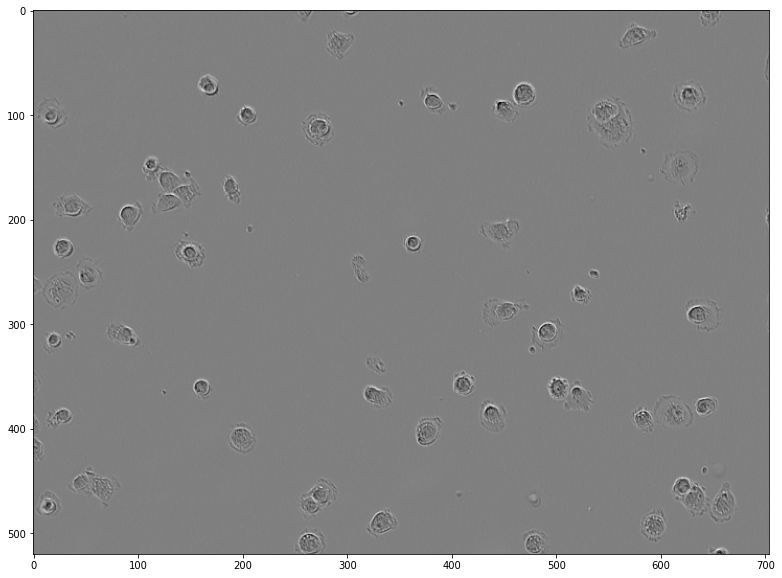

In [ ]:
# Let's take a look at the dataset image

img = mmcv.imread((livecell_test_img_path / 'A172' / 'A172_Phase_C7_1_00d00h00m_1.tif').as_posix())
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### Prepare a config

In [ ]:
import os
os.getcwd()

'/content/CBNetV2'

In [ ]:
# Copy the config scripts - base and child for cbnetv2 swin tiny to the local 

#!cp "$ds_path_pre"/cascade_mask_rcnn_swin_tiny_patch4_window7_mstrain_480-800_giou_4conv1f_adamw_3x_coco.py "$local_cfg.PROJECT_DIR"/CBNetV2/configs/swin
!cp "$ds_path_pre"/cascade_mask_rcnn_cbv2_swin_small_patch4_window7_mstrain_400-1400_adamw_2x_live.py "$local_cfg.PROJECT_DIR"/CBNetV2/configs/cbnet

In [ ]:
!rm -rf "$local_cfg.PROJECT_DIR"/CBNetV2/live_version_swin_small

**Resume from the checkpoint if needed**

In [ ]:

# !cp "$ds_path_pre"/epoch_8.pth "$local_cfg.PROJECT_DIR"/CBNetV2
# from mmcv import Config
# cfg = Config.fromfile('configs/cbnet/cascade_mask_rcnn_cbv2_swin_small_patch4_window7_mstrain_400-1400_adamw_2x_live.py')
# #cfg.keys()
# cfg.resume_from = './epoch_8.pth'


In [ ]:
#%%writefile ./configs/livecell/mask_rcnn_r50_caffe_fpn_mstrain-poly_1x_livecell.py
!tools/dist_train.sh configs/cbnet/cascade_mask_rcnn_cbv2_swin_small_patch4_window7_mstrain_400-1400_adamw_2x_live.py 1

/usr/local/lib/python3.7/dist-packages/torch/distributed/launch.py:186: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  FutureWarning,
2021-12-26 22:23:23,514 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.12 (default, Sep 10 2021, 00:21:48) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla P100-PCIE-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1.TC455_06.29190527_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.10.0+cu111
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Buil

**Extract the essential model checkpoint and log and download it**

In [ ]:
!mkdir ./live_version1_extract

In [ ]:
!cp ./live_version1/{20211223_111435.log,20211223_111435.log.json,epoch_24.pth,latest.pth} ./live_version1_extract  

In [ ]:
!zip -r ./live_version1_extract.zip ./live_version1_extract 

  adding: live_version1_extract/ (stored 0%)
  adding: live_version1_extract/20211223_111435.log (deflated 89%)
  adding: live_version1_extract/epoch_24.pth (deflated 11%)
  adding: live_version1_extract/20211223_111435.log.json (deflated 80%)
  adding: live_version1_extract/latest.pth (deflated 11%)


### Competition dataset

In [ ]:
# Copy the data part for competition
print('Start copying extra data from Google Drive to Virtual Machine...')
tic_move = time.time()  
!cp "$ds_path_pre"/competition_coco_test.json "$local_cfg.PROJECT_DIR"/data/livecell_images/
!cp "$ds_path_pre"/competition_coco_train.json "$local_cfg.PROJECT_DIR"/data/livecell_images/
!cp "$ds_path_pre"/competition_coco_val.json "$local_cfg.PROJECT_DIR"/data/livecell_images/
!cp "$ds_path_pre"/train.zip "$local_cfg.PROJECT_DIR"/data/livecell_images/
!cp "$ds_path_pre"/cascade_mask_rcnn_cbv2_swin_tiny_patch4_window7_mstrain_480-800_adamw_2x_compet.py "$local_cfg.PROJECT_DIR"/data/livecell_images/
print(('Done (t={:0.2f}s)'.format(time.time() - tic_move)))

Start copying extra data from Google Drive to Virtual Machine...
Done (t=6.11s)


In [ ]:
!ls "$local_cfg.PROJECT_DIR"/data/livecell_images/

apex.zip
cascade_mask_rcnn_cbv2_swin_tiny_patch4_window7_mstrain_480-800_adamw_2x_compet.py
cascade_mask_rcnn_cbv2_swin_tiny_patch4_window7_mstrain_480-800_adamw_2x_live.py
cascade_mask_rcnn_cbv2_swin_tiny_patch4_window7_mstrain_480-800_adamw_3x_coco.pth
cascade_mask_rcnn_swin_tiny_patch4_window7_mstrain_480-800_giou_4conv1f_adamw_3x_coco.py
competition_coco_test.json
competition_coco_train.json
competition_coco_val.json
livecell_coco_test_tiny.json
livecell_coco_train_tiny.json
livecell_coco_val_tiny.json
livecell_images
livecell_images.zip
train.zip


In [ ]:
!cp "$local_cfg.PROJECT_DIR"/data/livecell_images/cascade_mask_rcnn_cbv2_swin_tiny_patch4_window7_mstrain_480-800_adamw_2x_compet.py "$local_cfg.PROJECT_DIR"/CBNetV2/configs/cbnet

In [ ]:
!unzip "$local_cfg.PROJECT_DIR"/data/livecell_images/train.zip -d "$local_cfg.PROJECT_DIR"/data/livecell_images/

Archive:  /content/data/livecell_images/train.zip
   creating: /content/data/livecell_images/train/
  inflating: /content/data/livecell_images/train/0030fd0e6378.png  
  inflating: /content/data/livecell_images/train/0140b3c8f445.png  
  inflating: /content/data/livecell_images/train/01ae5a43a2ab.png  
  inflating: /content/data/livecell_images/train/026b3c2c4b32.png  
  inflating: /content/data/livecell_images/train/029e5b3b89c7.png  
  inflating: /content/data/livecell_images/train/0323e81d23d9.png  
  inflating: /content/data/livecell_images/train/03b27b381a5f.png  
  inflating: /content/data/livecell_images/train/042c17cd9143.png  
  inflating: /content/data/livecell_images/train/042dc0e561a4.png  
  inflating: /content/data/livecell_images/train/04928f0866b0.png  
  inflating: /content/data/livecell_images/train/049f02e0f764.png  
  inflating: /content/data/livecell_images/train/04cd81dfb245.png  
  inflating: /content/data/livecell_images/train/053d61766edb.png  
  inflating: /co

**Check the validity of annotation files w.r.t competition**

In [ ]:
ann_dir = local_cfg.PROJECT_DIR / 'data' / 'livecell_images'
val_ann_file = ann_dir / 'competition_coco_val.json'
val_ann_file

PosixPath('/content/data/livecell_images/competition_coco_val.json')

In [ ]:
file_format = str(val_ann_file).split('.')[-1]
val_data_infos = mmcv.load(str(val_ann_file), file_format=file_format)
val_data_infos.keys()

dict_keys(['images', 'annotations', 'categories'])

#### Start training

In [ ]:
!tools/dist_train.sh configs/cbnet/cascade_mask_rcnn_cbv2_swin_tiny_patch4_window7_mstrain_480-800_adamw_2x_compet.py 1

/usr/local/lib/python3.7/dist-packages/torch/distributed/launch.py:186: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use_env is set by default in torchrun.
If your script expects `--local_rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  FutureWarning,
2021-12-23 14:39:13,970 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.12 (default, Sep 10 2021, 00:21:48) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla P100-PCIE-16GB
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.1.TC455_06.29190527_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.10.0+cu111
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Buil

Log analysis

In [ ]:
# draw bbox_mAP and segm_mAP respectively

!python tools/analysis_tools/analyze_logs.py plot_curve compet_version1/20211223_143913.log.json --keys bbox_mAP --legend bbox_mAP --out bbox_mAP_cascade_mask_rcnn_cbv2_swin_tiny_ds_tiny.pdf

!python tools/analysis_tools/analyze_logs.py plot_curve compet_version1/20211223_143913.log.json --keys segm_mAP --legend mask_mAP --out segm_mAP_cascade_mask_rcnn_cbv2_swin_tiny_ds_tiny.pdf

plot curve of compet_version1/20211223_143913.log.json, metric is bbox_mAP
save curve to: bbox_mAP_cascade_mask_rcnn_cbv2_swin_tiny_ds_tiny.pdf
plot curve of compet_version1/20211223_143913.log.json, metric is segm_mAP
save curve to: segm_mAP_cascade_mask_rcnn_cbv2_swin_tiny_ds_tiny.pdf


**Store the selected checkpoint(s)**

In [ ]:
!mkdir ./compet_version1_extract

In [ ]:
!cp ./compet_version1/{20211223_133806.log,20211223_143913.log,20211223_143913.log.json,epoch_11.pth} ./compet_version1_extract

In [ ]:
!zip -r ./compet_version1_extract.zip ./compet_version1_extract

  adding: compet_version1_extract/ (stored 0%)
  adding: compet_version1_extract/20211223_133806.log (deflated 92%)
  adding: compet_version1_extract/20211223_143913.log.json (deflated 81%)
  adding: compet_version1_extract/20211223_143913.log (deflated 88%)
  adding: compet_version1_extract/epoch_11.pth (deflated 11%)


**Save result to Google Drive**

In [ ]:
!cp "$local_cfg.PROJECT_DIR"/CBNetV2/compet_version1_extract.zip "$ds_path_pre"/

In [ ]:
from google.colab import files
path_to_file = str(local_cfg.PROJECT_DIR/'CBNetV2'/'compet_version1_extract.zip')
files.download(path_to_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Evaluate the model**

In [ ]:
!python tools/test.py configs/cbnet/cascade_mask_rcnn_cbv2_swin_tiny_patch4_window7_mstrain_480-800_adamw_2x_compet.py compet_version1/latest.pth --eval bbox segm

loading annotations into memory...
Done (t=0.39s)
creating index...
index created!
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/CBNetV2/mmdet/core/anchor/builder.py:16: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
load checkpoint from local path: compet_version1/latest.pth
[                                                  ] 0/183, elapsed: 0s, ETA:/content/CBNetV2/mmdet/core/anchor/anchor_generator.py:323: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/content/CBNetV2/mmdet/core/anchor/anch